## Libraries

In [93]:
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [94]:
# Read the file resulsSPECIFICITY.csv into a pandas dataframe
df = pd.read_csv('resultsSPECIFICITY.csv', delimiter=';')

# Group the dataframe by OldFM, NewFM, Generator, and for the other columns compute the average
df = df.groupby(['OldFM', 'NewFM', 'Generator']).mean()
# Reset the index
df = df.reset_index()

## Wilcoxon-Signed Rank Tests

In [95]:
def test(datax, datay, label):
    test_times = stats.wilcoxon(datax, datay, alternative='two-sided', method='approx')
    print ("*** Test on " + label + " ***")
    print (test_times)
    print (datax.mean())
    print (datay.mean())
    print ("Effect size: " + str(test_times.zstatistic / math.sqrt(len(datax) + len(datay))))

### Fault detection

In [96]:
faultDetectionACTS = df.loc[df['Generator'] == 'ACTS', 'FaultDetection'].values
faultDetectionSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'FaultDetection'].values
faultDetectionBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'FaultDetection'].values
# Test the difference between the two generators
test(faultDetectionACTS, faultDetectionSPEC, "ACTS vs SPECIFICITY")
test(faultDetectionACTS, faultDetectionBDD, "ACTS vs BDD")
test(faultDetectionBDD, faultDetectionSPEC, "BDD vs SPECIFICITY")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=23509.0, pvalue=0.7802359258891938)
0.6693841537156863
0.6712686765686274
Effect size: -0.006177420560792815
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=20041.5, pvalue=0.22254009808098874)
0.6693841537156863
0.6693932935
Effect size: -0.027006861163086288
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=19328.0, pvalue=0.07214296460201768)
0.6693932935
0.6712686765686274
Effect size: -0.03981314632470019


### Specificity

In [97]:
specificityACTS = df.loc[df['Generator'] == 'ACTS', 'Specificity'].values
specificitySPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Specificity'].values
specificityBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Specificity'].values
# Test the difference between the two generators
test(specificityACTS, specificitySPEC, "ACTS vs SPECIFICITY")
test(specificityACTS, specificityBDD, "ACTS vs BDD")
test(specificityBDD, specificitySPEC, "BDD vs SPECIFICITY")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=0.0, pvalue=7.449676750475078e-40)
0.5409975103529412
0.580501288617647
Effect size: -0.29252558730948014
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=2773.0, pvalue=1.9834912109349712e-13)
0.5409975103529412
0.5551426761568627
Effect size: -0.1627296118266814
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=204.5, pvalue=1.0550620737499627e-30)
0.5551426761568627
0.580501288617647
Effect size: -0.2550408304967334


### Time

In [98]:
timeACTS = df.loc[df['Generator'] == 'ACTS', 'Time'].values
timeSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Time'].values
timeBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Time'].values
# Test the difference between the two generators
test(timeACTS, timeSPEC, "ACTS vs SPECIFICITY")
test(timeACTS, timeBDD, "ACTS vs BDD")
test(timeBDD, timeSPEC, "BDD vs SPECIFICITY")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=0.0, pvalue=1.7955947287290612e-168)
95.79411764705883
22.879411764705882
Effect size: -0.6125338440082468
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=0.0, pvalue=1.7965982435029394e-168)
95.79411764705883
21.99313725490196
Effect size: -0.6125333974599318
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=96090.5, pvalue=2.3588751905275718e-18)
21.99313725490196
22.879411764705882
Effect size: -0.19347722806868214


### Size

In [99]:
sizeACTS = df.loc[df['Generator'] == 'ACTS', 'Size'].values
sizeSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Size'].values
sizeBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Size'].values
# Test the difference between the two generators
test(sizeACTS, sizeSPEC, "ACTS vs SPECIFICITY")
test(sizeACTS, sizeBDD, "ACTS vs BDD")
test(sizeBDD, sizeSPEC, "BDD vs SPECIFICITY")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=34693.5, pvalue=6.540443646239299e-05)
7.411764705882353
7.55
Effect size: -0.08839350117780613
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=25537.5, pvalue=8.60422257108084e-05)
7.411764705882353
7.509803921568627
Effect size: -0.08694336846958964
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=13425.5, pvalue=0.09285979247921998)
7.509803921568627
7.55
Effect size: -0.03720692747645396


## Box-Plots

In [100]:
def box_plot(y1, y2, y3, ylabel, xscale = 'log', plot_correspondence = False, scale = 1, showfliers = True):
    plt.figure(figsize=(4,1.5))
    sns.boxplot(data=[y1/scale, y2/scale, y3/scale], orient='h', showfliers = showfliers, showmeans=True, meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"white"})
    plt.xscale(xscale)
    plt.yticks(range(3), labels=['ACTS', 'BDD', 'SPECGEN'])
    plt.xlabel(ylabel)
    plt.show()

### Fault detection

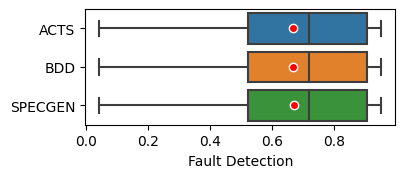

In [101]:
box_plot(faultDetectionACTS, faultDetectionBDD, faultDetectionSPEC, 'Fault Detection', xscale = 'linear', scale = 1, showfliers = False)

### Specificity

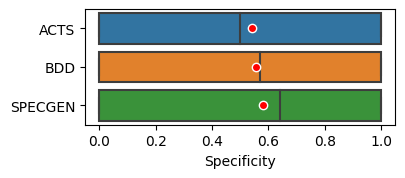

In [102]:
box_plot(specificityACTS, specificityBDD, specificitySPEC, 'Specificity', xscale = 'linear', scale = 1, showfliers = False)

### Time

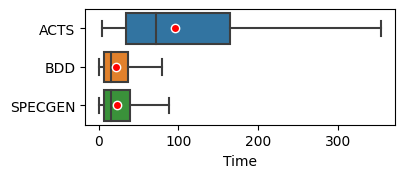

In [103]:
box_plot(timeACTS, timeBDD, timeSPEC, 'Time', xscale = 'linear', scale = 1, showfliers = False)

### Size

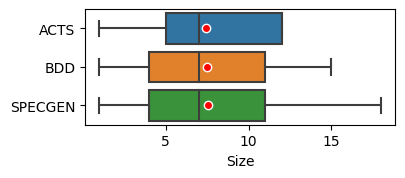

In [104]:
box_plot(sizeACTS, sizeBDD, sizeSPEC, 'Size', xscale = 'linear', scale = 1, showfliers = False)